In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def x_prime(v,b): #pochodna x
    dxdb= v*np.cos(b)
    return dxdb
    
def y_prime(v,b): #pierwsza pochodna y
    dydb= v*np.sin(b)
    return dydb

def x_prime2(v,b): #pochodna x
    dxdb= lambda y,t: v*np.cos(b) #działa ale to t tak z dupy
    return dxdb
    
def y_prime2(v,b): #pierwsza pochodna y
    dydb= lambda y,t: v*np.sin(b)
    return dydb

In [3]:
x_prime(2,2)

-0.8322936730942848

In [4]:
def x_bis(v,b,k1,k2,omega0,t,tał): #2pochodna x
    x_pr=x_prime(v,b)
    y_pr=y_prime(v,b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    #w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    ddx=-(1/m)*k*v*(x_pr*np.sin(omega)+y_pr*np.cos(omega))
    return ddx

def y_bis(v,b,k1,k2,omega0,t,tał): #2pochodna y
    x_pr=x_prime(v,b)
    y_pr=y_prime(v,b)
    g=9.81
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    #w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    ddy=(1/m)*k*v*(y_pr*np.sin(omega)+x_pr*np.cos(omega))- m*g
    return ddy

the right ones

In [8]:
def x_bis2(v,b,k1,k2,omega0,t,tał): #2pochodna x
    x_pr=x_prime(v,b)
    y_pr=y_prime(v,b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    #w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    ddx=lambda y,t: -(1/m)*k*v*(x_pr*np.sin(omega)+y_pr*np.cos(omega))
    return ddx

def y_bis2(v,b,k1,k2,omega0,t,tał): #2pochodna y
    x_pr=x_prime(v,b)
    y_pr=y_prime(v,b)
    g=9.81
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    #w=k*v**2
    omega=omega0*(1-np.exp(-t/tał))
    
    ddy=(1/m)*k*v*(y_pr*np.sin(omega)+x_pr*np.cos(omega))- m*g
    return ddy

In [9]:
def x_bis3(x0,v,b,k1,k2,omega0,t,tał):
    y_pr=y_prime(v,b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    omega=omega0*(1-np.exp(-t/tał))
    
    ddx=lambda y,t: -(1/m)*k*v*(x0*np.sin(omega)+y_pr*np.cos(omega))
    return ddx

In [49]:
def odeEuler(f,y0,t,):
    """
    approximate the solution of y'=f(y,t) by Euler's method
    """
    y=np.zeros(len(t))
    y[0]=y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

def odeEuler2(u0,t,v,b,k1,k2,omega0,tał): #działa!!!!
    """
    approximate the solution of y'=f(y,t) by Euler's method
    
    """
    y_pr=y_prime(v,b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    omega=omega0*(1-np.exp(-t/tał))
    du=lambda y,t: -(1/m)*k*v*(y*np.sin(omega0*(1-np.exp(-t/tał)))+y_pr*np.cos(omega0*(1-np.exp(-t/tał))))
    #du=lambda y,t: y*np.sin(omega0*(1-np.exp(-t/tał)))
    #du=lambda u,t: -(1/m)*k*v*(u*np.sin(omega0*(1-np.exp(-t/tał)))+y_pr*np.cos(omega0*(1-np.exp(-t/tał))))
    #ddy=lambda y,t: y*y_pr
    
    u=np.zeros(len(t))
    u[0]=u0
    for n in range(0,len(t)-1):
        u[n+1] = u[n] + du(u[n],t[n])*(t[n+1] - t[n])
    return u

def ode_second(t,u): #t,u - tablice  x'=u  ==> x=ut
    x=np.zeros(len(t))
    for i in range(0,len(t)-1):
        x[i]= ut[i]*t[i]
    return x


def odeEuler2_y(u0,t,v,b,k1,k2,omega0,tał): #działa!!!!
    """
    approximate the solution of y'=f(y,t) by Euler's method
    
    """
    g=9.81
    y_pr=y_prime(v,b)
    k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    #du=lambda y,t: (1/m)*k*v*(y_pr*np.sin(omega0*(1-np.exp(-t/tał)))+u*np.cos(omega0*(1-np.exp(-t/tał))))- m*g
    du=lambda y,t: u
    
    u=np.zeros(len(t))
    u[0]=u0
    for n in range(0,len(t)-1):
        u[n+1] = u[n] + du(u[n],t[n])*(t[n+1] - t[n])
    return u

#y_pr=y_prime(v,b)
#k=k1+(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
#du=lambda u,t: -(1/m)*k*v*(u*np.sin(omega0*(1-np.exp(-t/tał)))+y_pr*np.cos(omega0*(1-np.exp(-t/tał))))

def odeEuler3(du,u0,t,v,b,k1,k2,omega0,tał):
    
    u=np.zeros(len(t))
    u[0]=y0
    for n in range(0,len(t)-1):
        u[n+1] = u[n] + du(u[n],t[n])*(t[n+1] - t[n])
    return u


In [50]:
odeEuler2_y(u0,t,v,b,k1,k2,omega0,tał)

ValueError: setting an array element with a sequence.

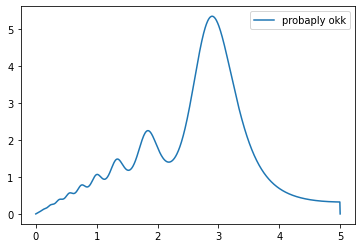

In [52]:
time=3
t = np.linspace(0,5,1000)
u0=1
m=10
amount= 25
v=26.5
b=0
u0=1
k1=1
k2=2
omega0=60
tał=1
u=odeEuler2(u0,t,v,b,k1,k2,omega0,tał) # to jest u, jeszcze trzeba znaleźć x, a to z zależności x'=u  ==> x=ut
x=ode_second(t,u)

#v=odeEuler2_y(u0,t,v,b,k1,k2,omega0,tał)
#y=ode_second(t,v)

#plt.plot(t,y)
plt.plot(t,x,label='probaply okk')
plt.legend()
plt.show()

In [ ]:
t = np.linspace(0,2,21)
y0 = 0
v=26.5
b=0
f = x_prime2(26,0)
#f = lambda y,t: y
y = odeEuler(f,y0,t)
y_true = np.exp(t) #nieistotne jakby co
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
#plt.axis([0,2,0,9])
plt.grid(True)
#plt.title("Solution of $y'=y , y(0)=0$")
plt.show()

In [ ]:
time=3
m=10
amount= 25
v=26.5
b=0
u0=0
k1=1
k2=2
omega0=60
tał=1
x_bis(v,b,k1,k2,omega0,time,tał)
y_bis(v,b,k1,k2,omega0,time,tał)
#ode2Euler(time,amount,v,b,u0,k1,k2,omega0,tał,m)

wykres dla pierwszej pochdnej x

In [ ]:
t = np.linspace(0,2,21)
y0 = 0
v=26.5
b=0
f = y_prime2(26,0)
#f = lambda y,t: y
y = odeEuler(f,y0,t)
#y_true = np.exp(t) #nieistotne jakby co
plt.plot(t,y,'b.-')#,t,y_true,'r-')
plt.legend(['Euler','True'])
#plt.axis([0,2,0,9])
plt.grid(True)
#plt.title("Solution of $y'=y , y(0)=0$")
plt.show()